<a href="https://colab.research.google.com/github/papapabi/torch-sandbox/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Dataset

Description:

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:

* Hours Studied: The total number of hours spent studying by each student.
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
* Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

P.S: Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios



## Creating a `torch.utils.data.Dataset`

In [1]:
import pandas as pd

df = pd.read_csv('student_performance_synthetic.csv')
features_df = df.iloc[:, :-1]
targets_df = df.iloc[:, -1]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df[df.select_dtypes(include='number').columns])

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,Yes,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,No,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,Yes,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,Yes,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,No,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,Yes,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,Yes,0.866505,0.145333,0.144454
9997,0.388965,0.781575,Yes,0.866505,0.145333,0.977285
9998,1.547633,1.588851,Yes,0.276805,-1.598526,2.070374


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [5]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,0,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,1,0.866505,0.145333,0.144454
9997,0.388965,0.781575,1,0.866505,0.145333,0.977285
9998,1.547633,1.588851,1,0.276805,-1.598526,2.070374


In [6]:
features_df = df.iloc[:, :-1]
targets_df = df.iloc[:, -1]
print(type(features_df))
print(type(targets_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
print(features_df.iloc[0].values)
print(type(features_df.iloc[0].values))

[ 0.77518771  1.70417565  1.          1.45620461 -1.24975394]
<class 'numpy.ndarray'>


In [8]:
targets_df.iloc[0].item()

1.8621668841598757

In [9]:
import torch


row_tensor = torch.tensor(features_df.iloc[0], dtype=torch.float)
target_tensor = torch.tensor(targets_df.iloc[0], dtype=torch.float)

/tmp/ipython-input-9-1543846434.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_tensor = torch.tensor(features_df.iloc[0], dtype=torch.float)


In [10]:
print(target_tensor.unsqueeze(0))

tensor([1.8622])


In [11]:
import os

import torch
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler


class StudentPerformanceDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file, preprocess=False):
        self.df = pd.read_csv(csv_file)

        # needs to be done before categorical values are converted into numbers
        if preprocess:
            scaler = StandardScaler()
            self.df[self.df.select_dtypes(include=['number']).columns] = scaler.fit_transform(self.df[self.df.select_dtypes(include='number').columns])

        # Encode categorical variables
        label_encoders = {}
        for column in self.df.select_dtypes(include=['object']).columns:
            label_encoders[column] = LabelEncoder()
            self.df[column] = label_encoders[column].fit_transform(self.df[column])

        self.features_df = self.df.iloc[:, :-1]
        self.targets_df = self.df.iloc[:, -1]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # columns 0, 1, 3, 4 are floats, while column 2 is categorical
        feature_values = self.features_df.iloc[idx].values
        row_tensor = torch.tensor(feature_values, dtype=torch.float)

        label_value = self.targets_df.iloc[idx].item()
        target_tensor = torch.tensor(label_value, dtype=torch.float)
        target_tensor = target_tensor.unsqueeze(0) # adds a dimension of size 1 into position 0 making [n]


        return row_tensor, target_tensor



## Creating torch.utils.data.DataLoaders

The key idea is that `train_test_split` operates on array-like objects (like lists, NumPy arrays, or Pandas DataFrames) that represent your entire dataset's indices or raw data, not directly on the Dataset object itself. Once you have the split indices or raw data, you then create Subset objects (or separate Dataset instances) to wrap these splits for PyTorch's DataLoader.

In [12]:
batch_size = 256

In [13]:
import torch

from sklearn.model_selection import train_test_split

csv_file = 'student_performance_synthetic.csv'
full_dataset = StudentPerformanceDataset(csv_file, preprocess=False)

# Get the full indices for the custom dataset
dataset_indices = list(range(len(full_dataset)))

# Split on the indices, not the objects directly!
train_indices, test_indices = train_test_split(
    dataset_indices,
    test_size=0.2,
    #random_state=42,
)

train_indices, val_indices = train_test_split(
    train_indices,
    test_size=0.25, # 0.25 of the remaining 80% is 20% of total
    random_state=42,
    # stratify=full_dataset.labels[train_indices] # Be careful with stratification on subsets
)
train_ds = torch.utils.data.Subset(dataset=full_dataset, indices=train_indices)
val_ds = torch.utils.data.Subset(dataset=full_dataset, indices=val_indices)
test_ds = torch.utils.data.Subset(dataset=full_dataset, indices=test_indices)

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size)

## Training and evaluation code

In [14]:
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm

/tmp/ipython-input-14-739575990.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [15]:
from collections.abc import Mapping, Sequence

def move(obj, device):
    """
    Recursively moves PyTorch tensors and modules within a Python object to a specified device.

    Args:
        obj: The Python object to move to a device, or to move its contents to a device.
             Can be a torch.Tensor, torch.nn.Module, list, tuple, set, dict, or other types.
        device: The compute device (e.g., 'cpu', 'cuda:0') to move objects to.

    Returns:
        The object with its PyTorch components moved to the specified device.
    """
    if isinstance(obj, torch.Tensor):
        return obj.to(device)
    elif isinstance(obj, torch.nn.Module):
        return obj.to(device)
    elif isinstance(obj, Mapping):
        return {k: move(v, device) for k, v in obj.items()}
    elif isinstance(obj, Sequence) and not isinstance(obj, str): # Exclude strings as they are sequences of chars
        return type(obj)(move(x, device) for x in obj)
    else:
        return obj

In [16]:
def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    """
    Runs a single epoch of training or validation in PyTorch.

    Args:
        model (torch.nn.Module): The PyTorch model to run for one epoch.
        optimizer (torch.optim.Optimizer): The object that will update the weights of the network.
                                           Pass None if in evaluation mode (no optimization needed).
        data_loader (torch.utils.data.DataLoader): DataLoader object that returns tuples of (input, label) pairs.
        loss_func (callable): The loss function that takes in two arguments (model outputs, labels)
                              and returns a scalar loss.
        device (torch.device or str): The compute location to perform training/evaluation (e.g., 'cpu', 'cuda:0').
        results (dict): A dictionary to store epoch-wise metrics.
        score_funcs (dict): A dictionary of scoring functions (name: function) to use to evaluate
                            the performance of the model. Each function should take (y_true, y_pred).
        prefix (str): A string to prefix to any scores placed into the `results` dictionary.
                      Commonly 'train_' or 'val_'.
        desc (str, optional): A description to use for the progress bar.

    Returns:
        float: Time spent on the epoch in seconds.
    """
    running_loss = []
    y_true_all = []
    y_pred_all = []

    start = time.time()

    # Set model to training or evaluation mode
    # NOTE: Layers like Dropout and BatchNorm behave differently during training and evaluation.
    # model.train() enables their training-specific behavior (e.g., dropout randomness, batch norm updating running stats),
    # while model.eval() sets them to evaluation mode (e.g., no dropout, batch norm using learned running stats)
    if optimizer is not None:
        model.train()
        # Enable anomaly detection for debugging during training
        # with torch.autograd.set_detect_anomaly(True): # Uncomment for debugging
        #     for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        #         ...
    else:
        model.eval()


    # Use torch.no_grad() for evaluation phase to save memory and speed up
    # computations by not building the computational graph.
    with torch.no_grad() if optimizer is None else torch.enable_grad():
        for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
            # Move the batch to the device we are using.
            inputs = move(inputs, device)
            labels = move(labels, device)

            # Forward pass
            y_hat = model(inputs)

            # Compute loss
            loss = loss_func(y_hat, labels)

            if model.training:
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

            # Use .item() for scalar loss to prevent memory leaks in the computational graph
            running_loss.append(loss.item())

            # Collect predictions and true labels for metric calculation
            # It's generally good practice to keep these on CPU for metric calculation
            # and to convert to numpy for compatibility with libraries like scikit-learn.
            # Only process if score_funcs are provided and labels are tensors.
            if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
                # Detach from graph, move to CPU, convert to numpy
                # For classification, often want raw logits for metrics,
                # then apply argmax for accuracy.
                # For regression, y_hat is already numerical.
                labels_np = labels.detach().cpu().numpy()
                y_hat_np = y_hat.detach().cpu().numpy()

                # Extend with current batch's data
                y_true_all.extend(labels_np.tolist())
                y_pred_all.extend(y_hat_np.tolist())

    # End training/evaluation epoch
    end = time.time()

    # Post-epoch metric calculations
    y_pred_final = np.asarray(y_pred_all)
    y_true_final = np.asarray(y_true_all) # Ensure y_true is also a numpy array

    # Handle classification output (e.g., logits to class predictions)
    # This logic assumes `y_pred_all` contains raw model outputs (logits or probabilities)
    # and `y_true_all` contains integer class labels for classification, or continuous values for regression.
    if y_pred_final.size > 0 and len(y_pred_final.shape) == 2 and y_pred_final.shape[1] > 1:
        # Assuming multi-class classification where y_hat are logits/probabilities
        y_pred_final_processed = np.argmax(y_pred_final, axis=1)
    else:
        # Assume regression or binary classification (where y_hat might be a single value)
        y_pred_final_processed = y_pred_final

    # Store results
    results[prefix + " loss"].append(np.mean(running_loss))
    for name, score_func in score_funcs.items():
        try:
            # Pass the processed predictions and true labels to score functions
            results[prefix + " " + name].append(score_func(y_true_final, y_pred_final_processed))
        except Exception as e: # Catch specific exception or general Exception
            print(f"Warning: Error calculating score '{name}': {e}. Appending NaN.")
            results[prefix + " " + name].append(float("NaN"))

    return end - start # time spent on epoch

In [17]:
import os

from typing import Callable, Optional, Union, Dict, Any
from collections import defaultdict

def train_network(
    model: nn.Module,
    loss_func: Callable[[torch.Tensor, torch.Tensor], torch.Tensor],
    train_loader: DataLoader,
    val_loader: Optional[DataLoader] = None,
    score_funcs: Optional[Dict[str, Callable[[Any, Any], float]]] = None,
    epochs: int = 50,
    device: Union[str, torch.device] = "cpu",
    checkpoint_file: Optional[str] = None,
    lr_schedule: Optional[torch.optim.lr_scheduler._LRScheduler] = None,
    optimizer: Optional[torch.optim.Optimizer] = None,
    disable_tqdm: bool = False
) -> pd.DataFrame:
    """
    Trains a PyTorch neural network.

    Args:
        model: The PyTorch model to train.
        loss_func: The loss function that takes in model outputs and labels, and returns a scalar loss.
        train_loader: PyTorch DataLoader for training data.
        val_loader: Optional PyTorch DataLoader for validation data, evaluated after each epoch.
        score_funcs: A dictionary of scoring functions (name: function) to evaluate model performance.
                     Each function should take (y_true, y_pred).
        epochs: The number of training epochs to perform.
        device: The compute location (e.g., 'cpu', 'cuda:0') to perform training.
        checkpoint_file: Optional path to a file for saving/loading model checkpoints.
        lr_schedule: The learning rate scheduler. If provided, `optimizer` must also be provided.
        optimizer: The optimizer used to update model parameters. If None, AdamW is used by default.
        disable_tqdm: If True, disables the progress bar.

    Returns:
        pd.DataFrame: A DataFrame containing epoch-wise training, validation, and test results.
    """
    if score_funcs is None:
        score_funcs = {}

    # Initialize results dictionary using defaultdict for cleaner appending
    results: Dict[str, list] = defaultdict(list)

    # Move model to the specified device
    model.to(device)

    if optimizer is None:
        print("Optimizer not provided. Using AdamW as default.")
        optimizer = torch.optim.AdamW(model.parameters())

    start_epoch = 0
    # Load from checkpoint if specified and exists
    if checkpoint_file and os.path.exists(checkpoint_file):
        print(f"Loading checkpoint from {checkpoint_file}...")
        checkpoint = torch.load(checkpoint_file, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        # Restore results if available
        if 'results' in checkpoint:
            # Ensure loaded results are compatible with defaultdict if needed
            for k, v in checkpoint['results'].items():
                results[k] = v
        print(f"Resuming training from epoch {start_epoch}.")
    elif checkpoint_file and not os.path.exists(checkpoint_file):
        print(f"Checkpoint file '{checkpoint_file}' not found. Starting training from scratch.")

    total_train_time = sum(results.get("total time", [0])) # Accumulate time if resuming

    # Main training loop
    for epoch in tqdm(range(start_epoch, epochs), desc="Overall Epoch", disable=disable_tqdm):
        # --- Training Phase ---
        print(f"\nEpoch {epoch+1}/{epochs} - Training...")
        current_epoch_train_time = run_epoch(
            model, optimizer, train_loader, loss_func, device,
            results, score_funcs, prefix="train", desc="Training Batch"
        )
        total_train_time += current_epoch_train_time

        results["epoch"].append(epoch)
        results["total time"].append(total_train_time)

        # --- Validation Phase ---
        if val_loader is not None:
            print(f"Epoch {epoch+1}/{epochs} - Validating...")
            # optimizer=None ensures run_epoch is in evaluation mode
            run_epoch(
                model, None, val_loader, loss_func, device,
                results, score_funcs, prefix="val", desc="Validation Batch"
            )

        # --- Learning Rate Schedule Step ---
        if lr_schedule is not None:
            if isinstance(lr_schedule, torch.optim.lr_scheduler.ReduceLROnPlateau):
                # ReduceLROnPlateau needs a metric; typically validation loss
                if val_loader is not None and "val loss" in results and len(results["val loss"]) > 0:
                    lr_schedule.step(results["val loss"][-1])
                else:
                    print("Warning: ReduceLROnPlateau scheduler requires validation loss but 'val_loader' is None or 'val loss' not found. Skipping step.")
            else:
                lr_schedule.step()
            print(f"Learning rate adjusted to: {optimizer.param_groups[0]['lr']:.6f}")

        # --- Checkpointing ---
        if checkpoint_file is not None:
            try:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'lr_scheduler_state_dict': lr_schedule.state_dict() if lr_schedule else None,
                    'results': dict(results) # Convert defaultdict to dict for saving
                }, checkpoint_file)
                print(f"Checkpoint saved to {checkpoint_file} at end of epoch {epoch+1}")
            except Exception as e:
                print(f"Error saving checkpoint: {e}")

    print("\nTraining complete!")
    return pd.DataFrame.from_dict(results)

In [18]:
def eval_network(
    model: nn.Module,
    loss_func: Callable[[torch.Tensor, torch.Tensor], torch.Tensor],
    test_loader: DataLoader,
    score_funcs: Optional[Dict[str, Callable[[Any, Any], float]]] = None,
    device: Union[str, torch.device] = "cpu",
    checkpoint_file: Optional[str] = None,
    disable_tqdm: bool = False
) -> Dict[str, float]:
    """
    Evaluates a PyTorch neural network on a held-out test set.

    Args:
        model: The PyTorch model to evaluate.
        loss_func: The loss function that takes in model outputs and labels, and returns a scalar loss.
        test_loader: PyTorch DataLoader for the test data.
        score_funcs: A dictionary of scoring functions (name: function) to evaluate model performance.
                     Each function should take (y_true, y_pred).
        device: The compute location (e.g., 'cpu', 'cuda:0') to perform evaluation.
        checkpoint_file: Optional path to a file for loading a pre-trained model checkpoint.
        disable_tqdm: If True, disables the progress bar.

    Returns:
        Dict[str, float]: A dictionary containing the evaluation loss and scores.
    """
    if score_funcs is None:
        score_funcs = {}

    # Move model to the specified device
    model.to(device)

    # Load from checkpoint if specified and exists
    if checkpoint_file and os.path.exists(checkpoint_file):
        print(f"Loading model from checkpoint: {checkpoint_file} for evaluation...")
        checkpoint = torch.load(checkpoint_file, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print("Model loaded successfully.")
    elif checkpoint_file and not os.path.exists(checkpoint_file):
        print(f"Warning: Checkpoint file '{checkpoint_file}' not found. Evaluating with current model state.")

    # Set model to evaluation mode
    model.eval()

    running_loss = []
    y_true_all = []
    y_pred_all = []

    start = time.time()

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating Test Set", leave=False, disable=disable_tqdm):
            inputs = move(inputs, device)
            labels = move(labels, device)

            y_hat = model(inputs)
            loss = loss_func(y_hat, labels)
            running_loss.append(loss.item())

            if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
                labels_np = labels.detach().cpu().numpy()
                y_hat_np = y_hat.detach().cpu().numpy()

                y_true_all.extend(labels_np.tolist())
                y_pred_all.extend(y_hat_np.tolist())

    end = time.time()
    eval_time = end - start

    # Post-evaluation metric calculations
    y_pred_final = np.asarray(y_pred_all)
    y_true_final = np.asarray(y_true_all)

    if y_pred_final.size > 0 and len(y_pred_final.shape) == 2 and y_pred_final.shape[1] > 1:
        y_pred_final_processed = np.argmax(y_pred_final, axis=1)
    else:
        y_pred_final_processed = y_pred_final

    final_results: Dict[str, float] = {}
    final_results["test loss"] = np.mean(running_loss)
    final_results["test_eval_time_seconds"] = eval_time

    for name, score_func in score_funcs.items():
        try:
            final_results[f"test {name}"] = score_func(y_true_final, y_pred_final_processed)
        except Exception as e:
            print(f"Warning: Error calculating score '{name}' during test evaluation: {e}. Setting to NaN.")
            final_results[f"test {name}"] = float("NaN")

    print(f"\nTest Evaluation Complete. Time: {eval_time:.2f} seconds.")
    print("Test Results:")
    for metric, value in final_results.items():
        print(f"  {metric}: {value:.4f}")

    return final_results

## Creating a baseline model

### Hyperparameters and constants

In [19]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

D = 5
n = 128

loss_func = torch.nn.MSELoss()
score_funcs = {"MAPE": mean_absolute_percentage_error, "MSE": mean_squared_error}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
fc_model = torch.nn.Sequential(
    torch.nn.Linear(D, n),
    torch.nn.BatchNorm1d(n),
    torch.nn.PReLU(),
    torch.nn.Linear(n, n),
    torch.nn.BatchNorm1d(n),
    torch.nn.PReLU(),
    torch.nn.Linear(n, n),
    torch.nn.BatchNorm1d(n),
    torch.nn.PReLU(),
    torch.nn.Linear(n, 1)
)

In [21]:
fc_results = train_network(model=fc_model, loss_func=loss_func, train_loader=train_dl, val_loader=val_dl, score_funcs=score_funcs, epochs=30, device=device)

Optimizer not provided. Using AdamW as default.


Overall Epoch:   0%|          | 0/30 [00:00<?, ?it/s]


Epoch 1/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 1/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 2/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 2/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 3/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 3/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 4/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 4/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 5/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 5/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 6/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 6/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 7/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 7/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 8/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 8/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 9/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 9/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 10/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 10/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 11/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 11/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 12/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 12/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 13/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 13/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 14/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 14/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 15/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 15/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 16/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 16/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 17/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 17/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 18/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 18/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 19/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 19/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 20/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 20/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 21/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 21/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 22/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 22/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 23/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 23/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 24/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 24/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 25/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 25/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 26/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 26/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 27/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 27/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 28/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 28/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 29/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 29/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 30/30 - Training...


Training Batch:   0%|          | 0/24 [00:00<?, ?it/s]

Epoch 30/30 - Validating...


Validation Batch:   0%|          | 0/8 [00:00<?, ?it/s]


Training complete!


<Axes: xlabel='epoch', ylabel='train MAPE'>

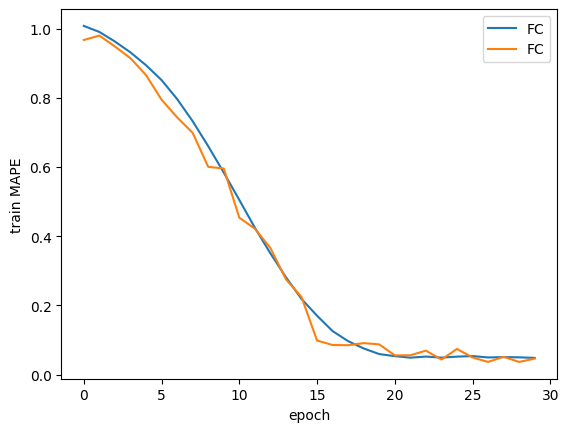

In [22]:
import seaborn as sns


sns.lineplot(x='epoch', y='train MAPE', data=fc_results, label='FC')
sns.lineplot(x='epoch', y='val MAPE', data=fc_results, label='FC')

<Axes: xlabel='epoch', ylabel='train loss'>

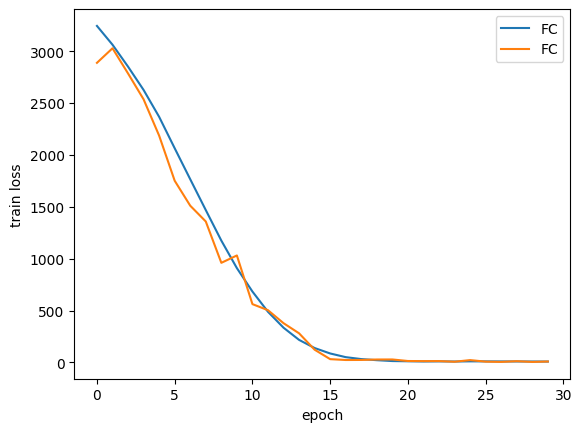

In [23]:
sns.lineplot(x='epoch', y='train loss', data=fc_results, label='FC')
sns.lineplot(x='epoch', y='val loss', data=fc_results, label='FC')

In [24]:
fc_test_results = eval_network(model=fc_model, loss_func=loss_func, test_loader=test_dl, score_funcs=score_funcs, device=device)

Evaluating Test Set:   0%|          | 0/8 [00:00<?, ?it/s]


Test Evaluation Complete. Time: 0.20 seconds.
Test Results:
  test loss: 8.9559
  test_eval_time_seconds: 0.2009
  test MAPE: 0.0464
  test MSE: 8.9475


## Inference code

In [28]:
import numpy as np

def predict(features: list):
    np_features = np.asarray(features)
    np_features = np.expand_dims(np_features, axis=0) # add a batch dimension
    input_tensor = torch.tensor(np_features, dtype=torch.float)


    with torch.no_grad():
        Y_pred = fc_model(input_tensor).cpu().numpy()

    return Y_pred

In [34]:
predict([9, 90, 1, 9, 9])

array([[86.898186]], dtype=float32)